Η λογική που θα ακολουθήσω για την δημιουργία λεξικών είναι η εξής:    
<br>**Βήμα 1ο**: Θα κρατήσω μόνο τα reviews που έχουν 1 ή 5 αστέρια. Αυτά με 1 αστέρι θα τα κατηγοριοποιήσω ως negative reviews(False), ενώ αυτά που έχουν 5 αστέρια ως positive reviews(True).   
<br>**Βήμα 2ο**: Θα ανακατέψω τα reviews και θα αναπαραστήσω τα κείμενα τους σε μορφή vector. Θα χρησιμοποιήσω το CountVectorizer γιατί μετά από δοκιμές μου δίνει καλύτερα αποτελέσματα από το tf-idf vectorizer.
<br>**Βήμα 3ο**: Θα εκπαιδεύσω ένα μοντέλο με επίβλεψη Linear Regressor(επειδη μου έδινε τo καλύτερο score στην Ασκηση2), για να μπορεί να κατηγοριοποιήσει με ακρίβεια αυτά τα reviews.   
<br>**Βήμα 4ο**: Μετά την εκπαίδευση, θα κοιτάξω σε ποιες λέξεις έχει δώσει την μεγαλύτερη βαρύτητα για κάθε κατηγορία και με αυτές τις λέξεις θα φτιάξω τα λεξικά.    
<br>**Βήμα 5ο**: Για να μετρήσω την ακρίβεια των λεξικών, θα χρησιμοποιήσω το accuracy χρησιμοποιώντας έτοιμο dataset που περιέχει θετικές και αρνητικές λέξεις.
<br> Θα περιγράψω και το trade-off μεταξύ μεγέθους και ακρίβειας των λεξικών.


In [168]:
import pandas as pd
import numpy as np
import sklearn.utils as utils
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.linear_model as linear_model
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
true_positive_negatives = pd.read_excel("Positive and Negative Word List.xlsx")
true_positive_negatives.rename(columns={"Negative Sense Word List": "Negative", "Positive Sense Word List": "Positive"}, inplace=True)
true_positive_negatives.dropna(subset= ["Negative", "Positive"], inplace=True)
true_positive_negatives = true_positive_negatives[["Negative", "Positive"]]
print(true_positive_negatives.shape)
true_positive_negatives.head()

(4696, 2)


,Negative,Positive
1,abnormal,able
2,abolish,abundance
3,abominable,accelerate
4,abominably,accept
5,abominate,acclaim


In [67]:
df_rev = pd.read_csv("reviews.csv")
df_rev = df_rev[["review_id", "stars", "text"]].dropna(axis=0)
print(df_rev.shape)
df_rev.head()

(881973, 3)


,review_id,stars,text
0,BiTunyQ73aT9WBnpR9DZGw,5.0,I've taken a lot of spin classes over the year...
1,AqPFMleE6RsU23_auESxiA,5.0,"Wow! Yummy, different, delicious. Our favo..."
2,JrIxlS1TzJ-iCu79ul40cQ,1.0,I am a long term frequent customer of this est...
3,8JFGBuHMoiNDyfcxuWNtrA,4.0,Good food--loved the gnocchi with marinara\nth...
4,oyaMhzBSwfGgemSGuZCdwQ,5.0,Tremendous service (Big shout out to Douglas) ...


In [69]:
extreme_reviews = df_rev.loc[(df_rev.stars == 5.0) | (df_rev.stars == 1.0)]
extreme_reviews.stars = extreme_reviews.stars.replace({1.0: False, 5.0: True})
print(extreme_reviews.shape)
extreme_reviews.head()

(484296, 3)


c:\Users\Giannis\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,review_id,stars,text
0,BiTunyQ73aT9WBnpR9DZGw,True,I've taken a lot of spin classes over the year...
1,AqPFMleE6RsU23_auESxiA,True,"Wow! Yummy, different, delicious. Our favo..."
2,JrIxlS1TzJ-iCu79ul40cQ,False,I am a long term frequent customer of this est...
4,oyaMhzBSwfGgemSGuZCdwQ,True,Tremendous service (Big shout out to Douglas) ...
5,Xs8Z8lmKkosqW5mw_sVAoA,True,My absolute favorite cafe in the city. Their b...


In [70]:
SX = utils.shuffle(extreme_reviews) #shuffle the data
print(SX.shape)
SX.head()


(484296, 3)


,review_id,stars,text
167889,oByx0pmWXJhdh3VlgtSg_Q,False,I eat sushi every week. I like to explore new ...
183163,g1To0sYU_PUzAEKOeZg5Mg,True,Went there for the first time for dinner yeste...
387866,Yndb6eQqDQ99AgUhbMPBfg,True,So glad this place opened up in this neighborh...
400172,HpSdeU92Ybpj0dSsD7-2GA,True,when I made the horrible decision of living in...
281160,An0UQcF-jl020dXGdW7BOA,True,Just because a restaurant is located on A COLL...


In [186]:
vectorizer = CountVectorizer(stop_words='english').fit(SX.text)
X = vectorizer.transform(SX.text)
y_train = SX.stars

In [187]:
#------Logistic Regression
lr_clf = linear_model.LogisticRegression(solver='lbfgs', max_iter=600)
lr_clf.fit(X, y_train)


LogisticRegression(max_iter=600)

Οι λέξεις που χρησιμοποιούνται για αρνητικές κριτικές είναι αυτές με αρνητικά coefficient και όσο πιο χαμηλή τιμή έχουν τόσο πιο σημαντικές είναι για την αρνητική κατηγοριοποίηση. Το αντίστροφο ισχύει για τις λέξεις για την θετική κατηγοριοποίηση με τις θετικές τιμές.<br>
Για sensitivities στο range(0.1, 5) με βήμα 0.1 παίρνουμε τις λέξεις που ικανοποιούν το αντίστοιχο sensitivity και τις αποθηκεύουμε σε λίστες.

In [272]:
feature_names = vectorizer.get_feature_names() # List where each index corresponds to a word 
negative_words_lists = []
positive_words_lists = [] 
 
coef_for_negatives = sorted(zip(lr_clf.coef_[0], feature_names))
coef_for_positives = sorted(zip(lr_clf.coef_[0], feature_names), reverse=True)

for sensitivity in np.arange(0.1, 5, 0.1):  # Sensitivity factor

    positive_words = []
    negative_words = []

    # Keeping the most significant Negative Words
    for i, j in coef_for_negatives:
        if i > 0:
            break
        if i < -sensitivity:
            negative_words.append(j)

    # Keeping the most significant Positive Words
    for i, j in coef_for_positives:
        if i < 0:
            break
        if i > sensitivity:
            positive_words.append(j)

    negative_words_lists.append(negative_words)
    positive_words_lists.append(positive_words)

Στο παρακάτω block, ελέγχουμε ποιες λέξεις από τα λεξικά που έχουμε δημιουργήσει, ανήκουν στα datasets που κατεβάσαμε και υπολογίζουμε τα accuracy scores από τα μεγέθη των λεξικών. Υπολογίζω και τα negative positives(τις λέξεις που βρήκαμε αλλά δεν ανήκουν στα true datasets)

In [318]:
true_negative_words = set(true_positive_negatives.Negative)
true_positive_words = set(true_positive_negatives.Positive)

positive_hits_list = []
positive_misses_list = []

for i in range(len(positive_words_lists)):
    positive_hits = 0
    positive_misses = 0
    for pred_positive in positive_words_lists[i]:
        if pred_positive in true_positive_words:
            positive_hits += 1
        else:
            positive_misses += 1
    positive_hits_list.append(positive_hits)
    positive_misses_list.append(positive_misses)

negative_hits_list = []
negative_misses_list = []

for i in range(len(negative_words_lists)):
    negative_hits = 0
    negative_misses = 0
    for pred_negative in negative_words_lists[i]:
        if pred_negative in true_negative_words:
            negative_hits += 1
        else:
            negative_misses += 1
    negative_hits_list.append(negative_hits)
    negative_misses_list.append(negative_misses)


# Calculating Negative and Positive scores
negative_scores = []
for i, negative_hits in enumerate(negative_hits_list):
    if len(positive_words_lists[i]) != 0:
        negative_scores.append(negative_hits/len(negative_words_lists[i]))
    else:
        negative_scores.append(0)

positive_scores = []
for i, positive_hits in enumerate(positive_hits_list):
    if len(positive_words_lists[i]) != 0:
        positive_scores.append(positive_hits/len(positive_words_lists[i]))
    else:
        positive_scores.append(0)

Στο παρακάτω block αποθηκεύουμε τα μεγέθη των λιστών για κάθε sensitivity.

In [299]:
negative_words_lists_len = []

for i in negative_words_lists:
    negative_words_lists_len.append(len(i))

positive_words_lists_len = []
for i in positive_words_lists:
    positive_words_lists_len.append(len(i))


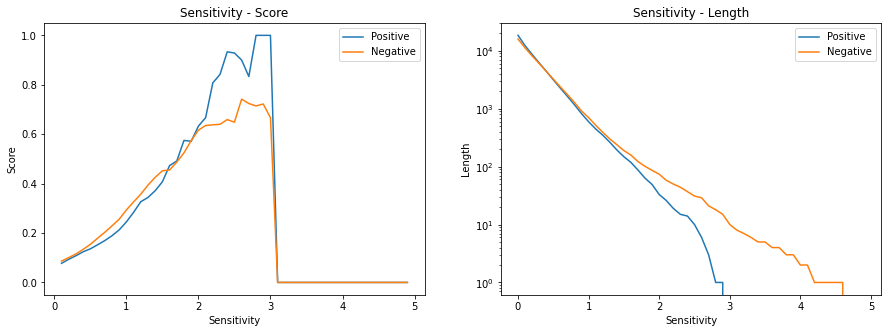

In [316]:
x_axis1 = np.arange(0.1, 5, 0.1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(x_axis1, positive_scores, label="Positive")
plt.plot(x_axis1, negative_scores, label="Negative")
plt.title('Sensitivity - Score')
plt.xlabel('Sensitivity')
plt.ylabel('Score')
plt.legend()

x_axis2 = np.arange(0, 5, 0.1)
plt.subplot(1, 2, 2)
plt.yscale('log')
plt.plot(x_axis2, positive_words_lists_len, label="Positive")
plt.plot(x_axis2, negative_words_lists_len, label="Negative")
plt.title('Sensitivity - Length')
plt.xlabel('Sensitivity')
plt.ylabel('Length')
plt.legend()

plt.show()

Από το Sensitivity - Score διάγραμμα, βλέπουμε ότι όσο αυξάνεται το sensitivity τόσο καλύτερα predictions κάνουμε(οι λέξεις που περιέχει το λεξικό μας είναι όντος negative και positive). Όμως, από το διάγραμμα Sensitivity - Length, βλέπουμε ότι όσο αυξάνεται το sensitivity, μειώνεται το μέγεθος των λεξικών μας. Αυτό είναι το trade-off που παρουσιάζεται και με βάση τα διαγράμματα, θα επέλεγα τα λεξικά που δημιουργήθηκαν με Sensitivity ~ 1.8 που πετυχαίνει Score ~ 0.6 και με μεγέθη λεξικών Length ~ 60.   

Το dataset που χρησιμοποιώ για τους ελέγχους είναι πολύ πιθανό να μην περιέχει όλες τις θετικές και αρνητικές λέξεις ειδικά αυτές που αφορούν συγκεκριμένα τα εστιατόρια, αλλά όλες οι λέξεις που περιέχει είναι όντως θετικές και αρνητικές αντίστοιχα. Άρα, τα score που εμφανίζονται είναι οι χειρότερες περιπτώσεις που μπορούμε να πάρουμε. Θα βρω χειρωνακτικά το score στις θετικές λέξεις του λεξικού με Sensitivity ~ 1.8.

In [347]:
print(f"Positive Words: {', '.join(positive_words_lists[18])}\n\nNumber of words:{len(positive_words_lists[18])}\nPredicted Accuracy:{positive_scores[18]}")

Positive Words: incredible, heaven, amazing, delish, phenomenal, kudos, perfection, fantastic, exceptional, delicious, outstanding, deliciousness, excellent, awesome, grateful, bangin, delectable, meticulous, restored, notch, fabulous, perfect, thorough, impeccable, efficient, blast, disappoint, gene, happier, exceeded, addicted, refreshing, skeptical, best, brad, terrific, gem, beat, bubbly, comforter, pleasantly, ndelicious, sabrinas, perfectly, yay, oscar, reasonably, ngreat, pullover, creaking, whining, cornell, situations, orgasm, yummy, wynnewood, favorite, scrumptious, dani, informative, flawless, knowledgeable, appreciated

Number of words:63
Predicted Accuracy:0.5714285714285714


Από τις 63 λέξεις με δικιά μου αξιολόγηση, βρήκα ότι 47 από τις 63 παραπάνω λέξεις είναι όντος θετικές προς τα εστιατόρια που μας δίνει **Accuracy 0.74** που είναι σημαντικά υψηλότερο από αυτό που υπολόγισα με το Dataset.